# Univariate, Bivariate, and Multivariate Analysis
## Consumer Purchase Prediction

This notebook performs comprehensive univariate, bivariate, and multivariate analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../../data/Advertisement.csv')


## 1. Univariate Analysis


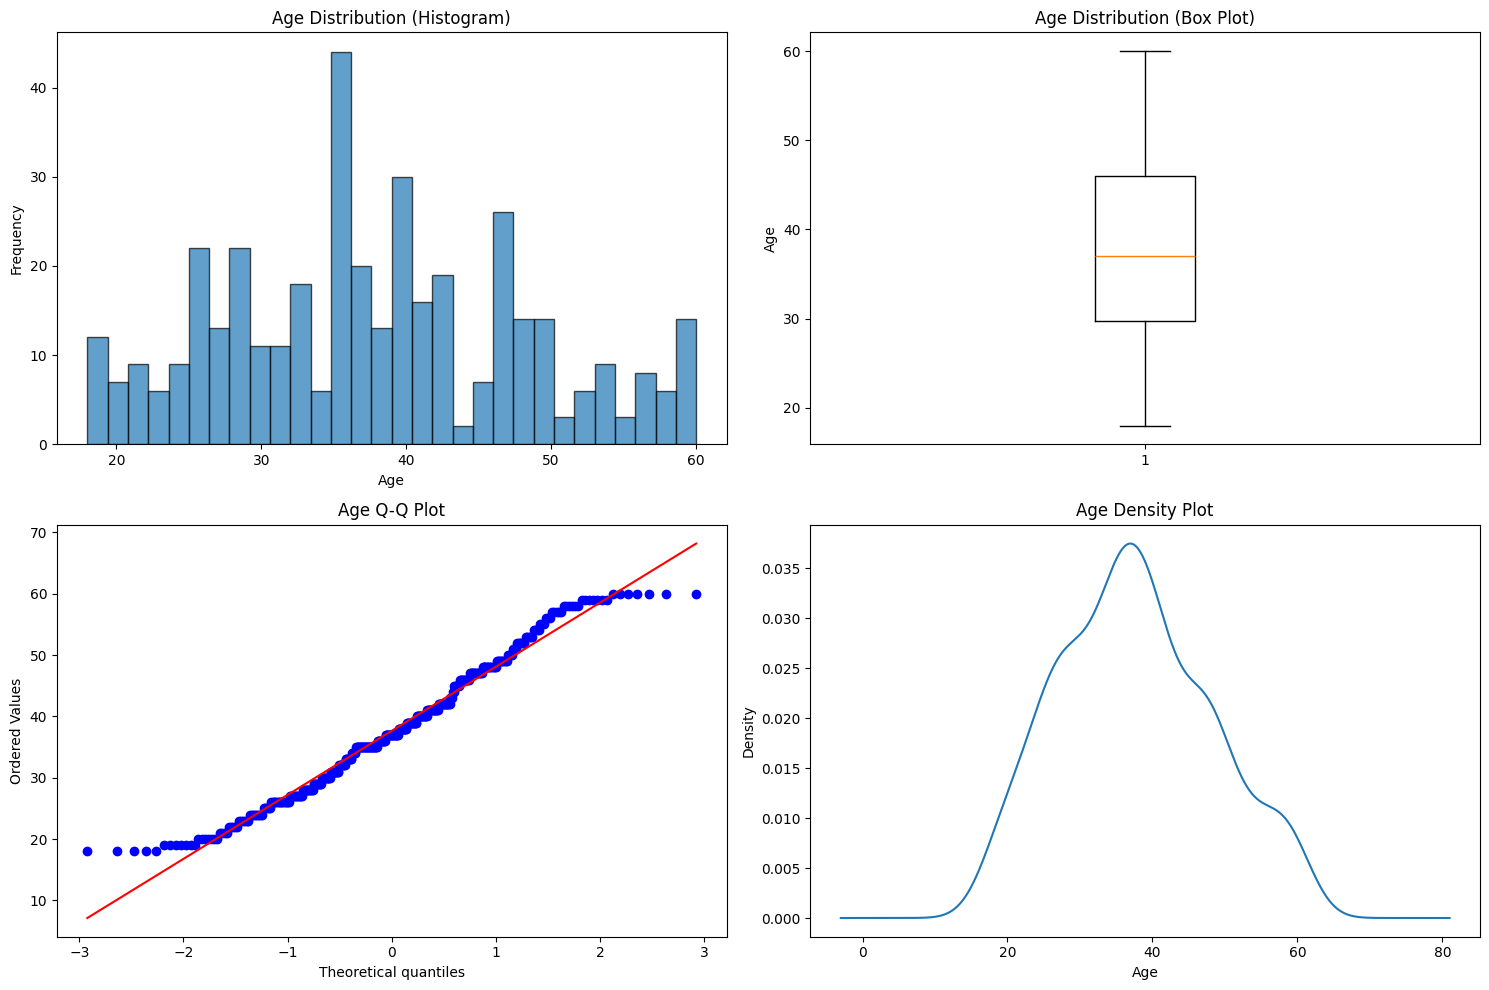

Age Statistics:
Mean: 37.66
Median: 37.00
Std: 10.48
Skewness: 0.231
Kurtosis: -0.623


In [2]:
# Univariate analysis for Age
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram
axes[0, 0].hist(df['Age'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Age Distribution (Histogram)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Box plot
axes[0, 1].boxplot(df['Age'], vert=True)
axes[0, 1].set_title('Age Distribution (Box Plot)')
axes[0, 1].set_ylabel('Age')

# Q-Q plot
stats.probplot(df['Age'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Age Q-Q Plot')

# Density plot
df['Age'].plot.density(ax=axes[1, 1])
axes[1, 1].set_title('Age Density Plot')
axes[1, 1].set_xlabel('Age')

plt.tight_layout()
plt.show()

print(f"Age Statistics:")
print(f"Mean: {df['Age'].mean():.2f}")
print(f"Median: {df['Age'].median():.2f}")
print(f"Std: {df['Age'].std():.2f}")
print(f"Skewness: {df['Age'].skew():.3f}")
print(f"Kurtosis: {df['Age'].kurtosis():.3f}")


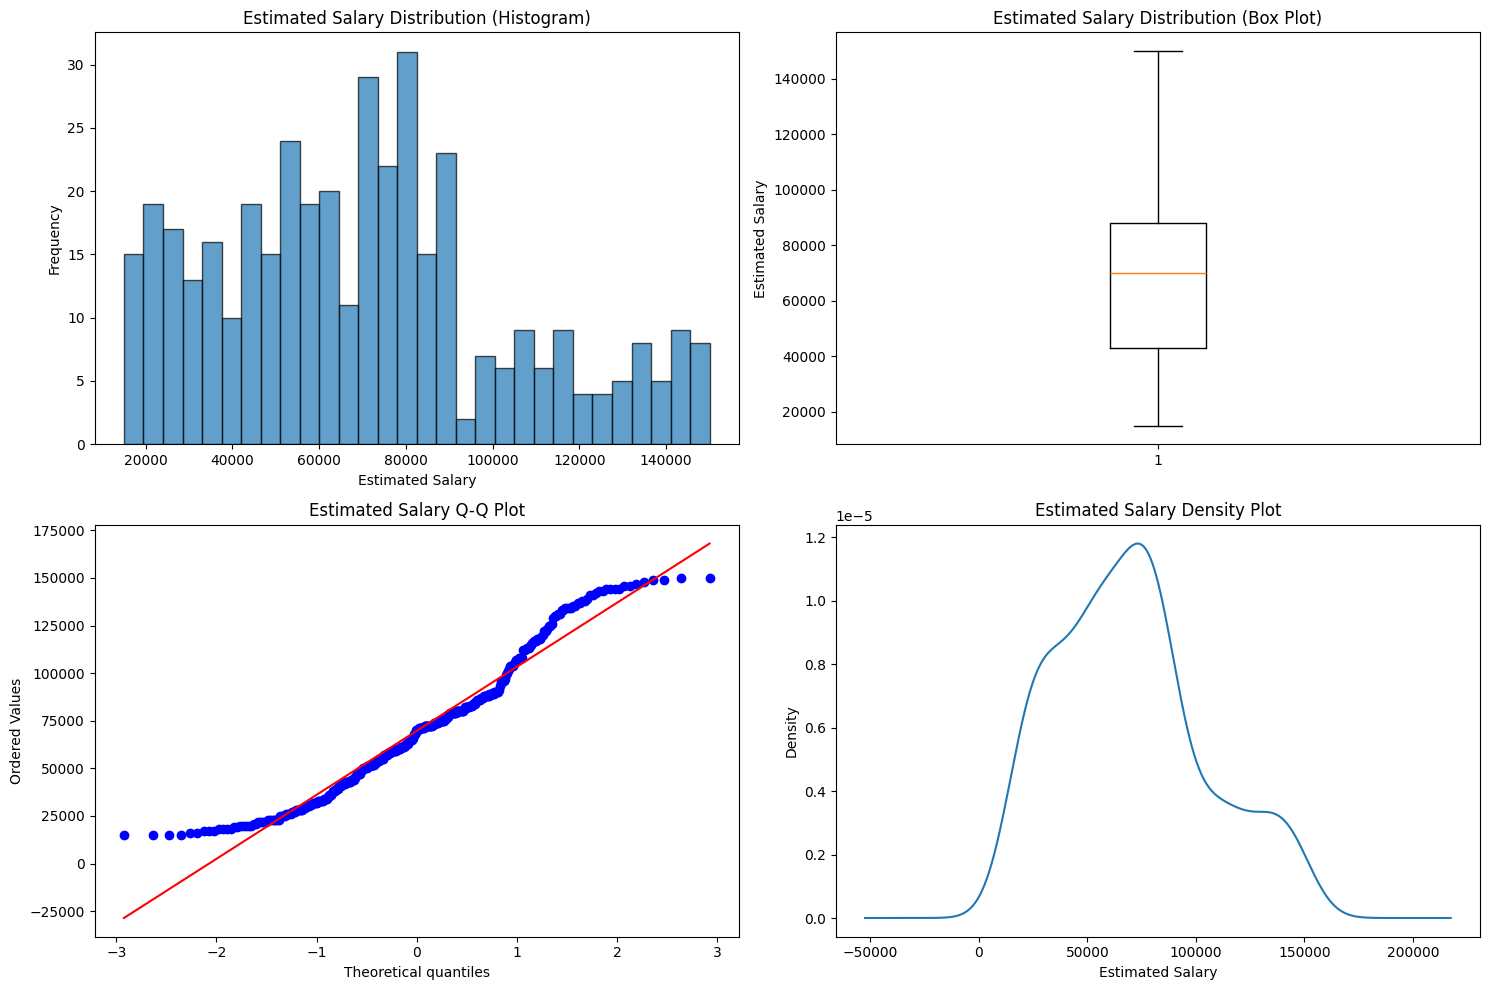

Estimated Salary Statistics:
Mean: 69742.50
Median: 70000.00
Std: 34096.96
Skewness: 0.495
Kurtosis: -0.406


In [3]:
# Univariate analysis for EstimatedSalary
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(df['EstimatedSalary'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Estimated Salary Distribution (Histogram)')
axes[0, 0].set_xlabel('Estimated Salary')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].boxplot(df['EstimatedSalary'], vert=True)
axes[0, 1].set_title('Estimated Salary Distribution (Box Plot)')
axes[0, 1].set_ylabel('Estimated Salary')

stats.probplot(df['EstimatedSalary'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Estimated Salary Q-Q Plot')

df['EstimatedSalary'].plot.density(ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary Density Plot')
axes[1, 1].set_xlabel('Estimated Salary')

plt.tight_layout()
plt.show()

print(f"Estimated Salary Statistics:")
print(f"Mean: {df['EstimatedSalary'].mean():.2f}")
print(f"Median: {df['EstimatedSalary'].median():.2f}")
print(f"Std: {df['EstimatedSalary'].std():.2f}")
print(f"Skewness: {df['EstimatedSalary'].skew():.3f}")
print(f"Kurtosis: {df['EstimatedSalary'].kurtosis():.3f}")


## 2. Bivariate Analysis


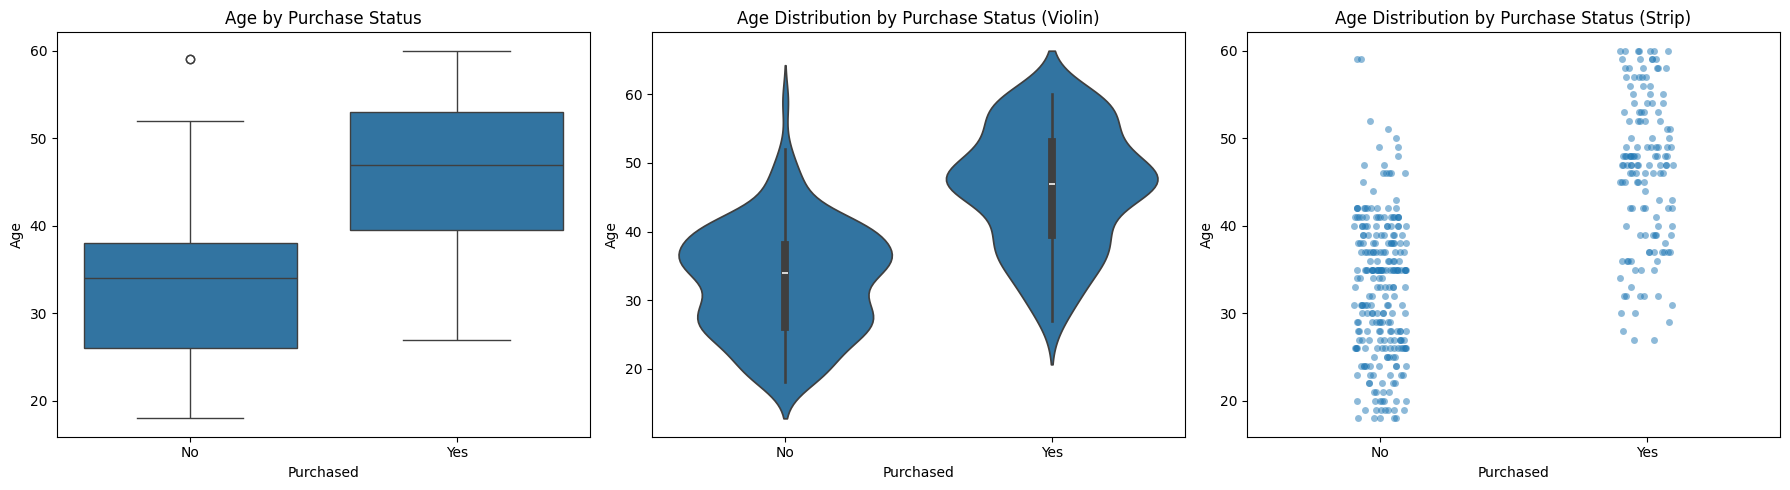

T-test: t-statistic=-15.8664, p-value=0.0000


In [4]:
# Age vs Purchased
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='Purchased', y='Age', ax=axes[0])
axes[0].set_title('Age by Purchase Status')
axes[0].set_xticklabels(['No', 'Yes'])

sns.violinplot(data=df, x='Purchased', y='Age', ax=axes[1])
axes[1].set_title('Age Distribution by Purchase Status (Violin)')
axes[1].set_xticklabels(['No', 'Yes'])

sns.stripplot(data=df, x='Purchased', y='Age', ax=axes[2], alpha=0.5)
axes[2].set_title('Age Distribution by Purchase Status (Strip)')
axes[2].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

# Statistical test
from scipy.stats import ttest_ind
age_0 = df[df['Purchased'] == 0]['Age']
age_1 = df[df['Purchased'] == 1]['Age']
t_stat, p_value = ttest_ind(age_0, age_1)
print(f"T-test: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")


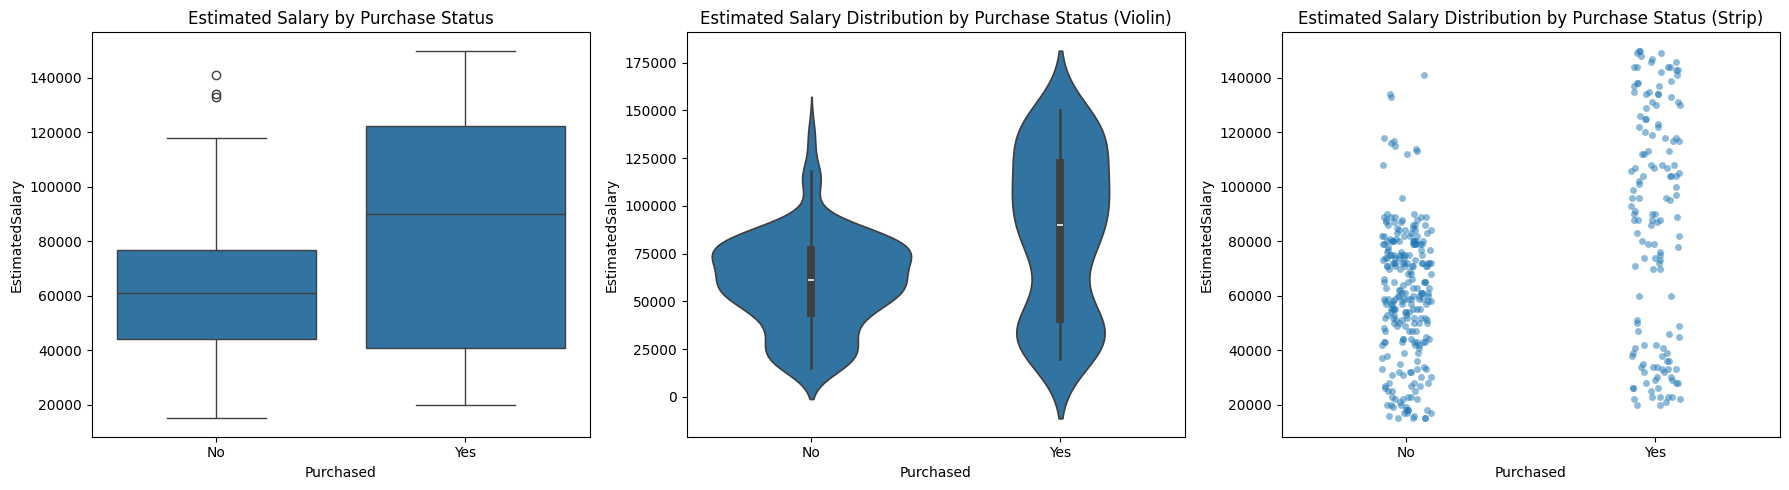

T-test: t-statistic=-7.7494, p-value=0.0000


In [5]:
# EstimatedSalary vs Purchased
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df, x='Purchased', y='EstimatedSalary', ax=axes[0])
axes[0].set_title('Estimated Salary by Purchase Status')
axes[0].set_xticklabels(['No', 'Yes'])

sns.violinplot(data=df, x='Purchased', y='EstimatedSalary', ax=axes[1])
axes[1].set_title('Estimated Salary Distribution by Purchase Status (Violin)')
axes[1].set_xticklabels(['No', 'Yes'])

sns.stripplot(data=df, x='Purchased', y='EstimatedSalary', ax=axes[2], alpha=0.5)
axes[2].set_title('Estimated Salary Distribution by Purchase Status (Strip)')
axes[2].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

salary_0 = df[df['Purchased'] == 0]['EstimatedSalary']
salary_1 = df[df['Purchased'] == 1]['EstimatedSalary']
t_stat, p_value = ttest_ind(salary_0, salary_1)
print(f"T-test: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")


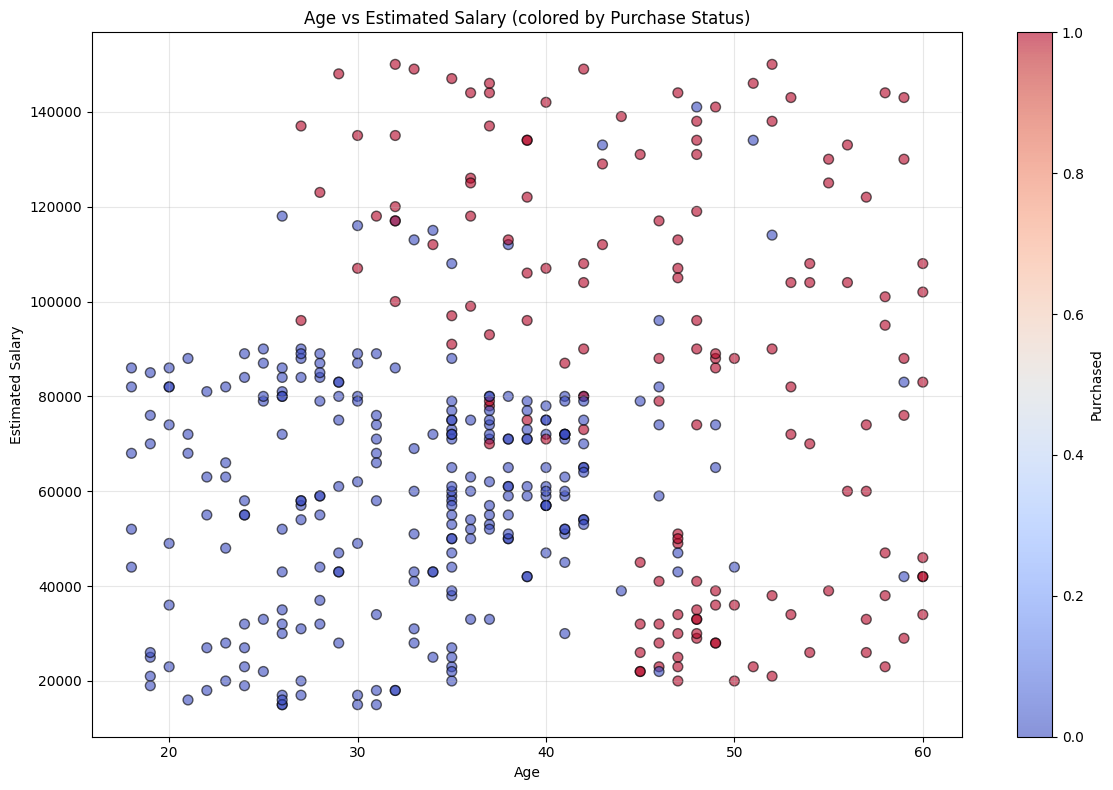

Correlation between Age and Estimated Salary: 0.1552


In [6]:
# Age vs EstimatedSalary
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Age'], df['EstimatedSalary'], 
                     c=df['Purchased'], cmap='coolwarm', 
                     alpha=0.6, s=50, edgecolors='black')
plt.colorbar(scatter, label='Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Age vs Estimated Salary (colored by Purchase Status)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation
corr = df['Age'].corr(df['EstimatedSalary'])
print(f"Correlation between Age and Estimated Salary: {corr:.4f}")


Gender vs Purchased:
Purchased    0   1
Gender            
Female     127  77
Male       130  66

Percentage:
Purchased          0          1
Gender                         
Female     62.254902  37.745098
Male       66.326531  33.673469


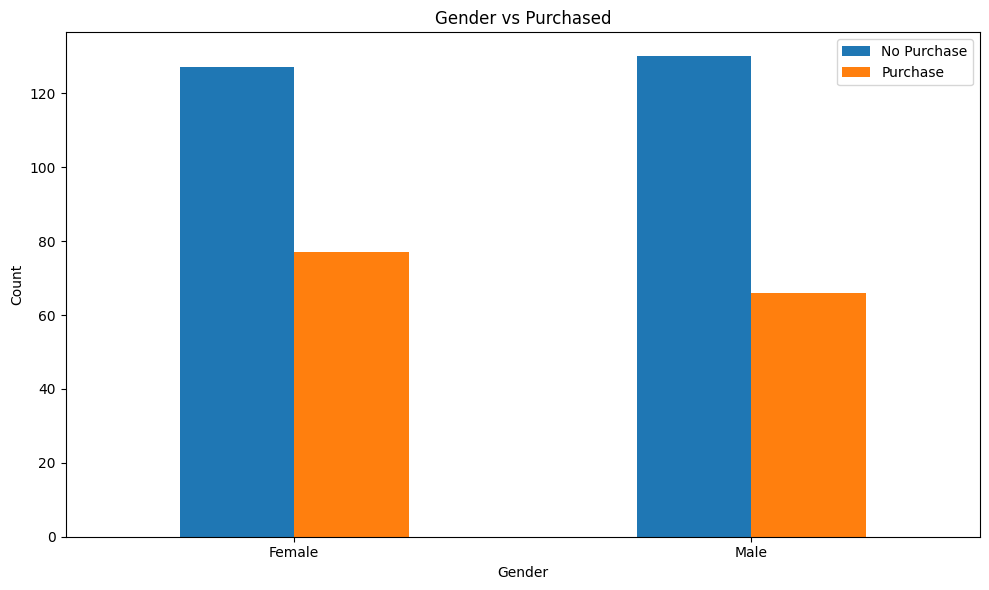

In [7]:
# Gender vs Purchased
gender_purchase = pd.crosstab(df['Gender'], df['Purchased'])
print("Gender vs Purchased:")
print(gender_purchase)
print("\nPercentage:")
print((gender_purchase.div(gender_purchase.sum(axis=1), axis=0)) * 100)

gender_purchase.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Gender vs Purchased')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Purchase', 'Purchase'])
plt.tight_layout()
plt.show()


## 3. Multivariate Analysis


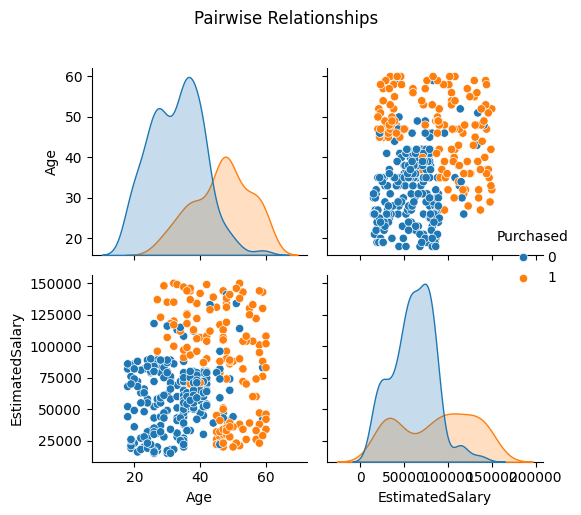

In [8]:
# Pairwise relationships
sns.pairplot(df[['Age', 'EstimatedSalary', 'Purchased']], 
             hue='Purchased', diag_kind='kde')
plt.suptitle('Pairwise Relationships', y=1.02)
plt.tight_layout()
plt.show()


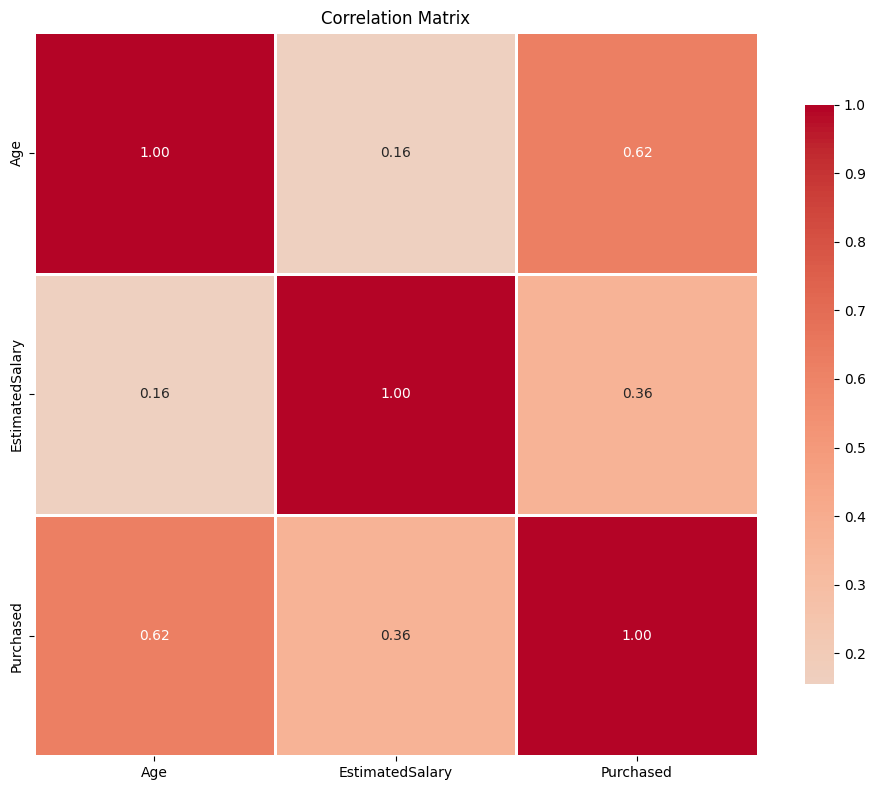

In [9]:
# Correlation matrix
correlation_matrix = df[['Age', 'EstimatedSalary', 'Purchased']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


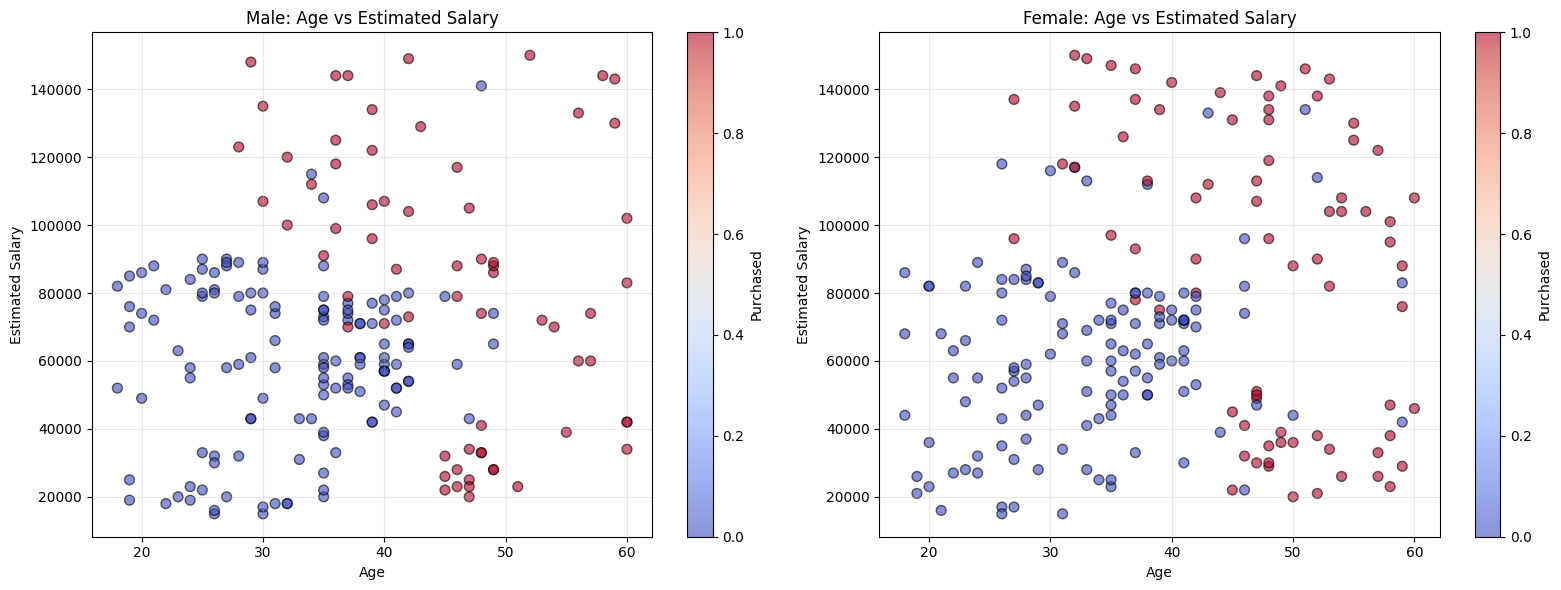

In [10]:
# Multivariate visualization: Age, Salary, and Purchased by Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, gender in enumerate(df['Gender'].unique()):
    gender_df = df[df['Gender'] == gender]
    scatter = axes[idx].scatter(gender_df['Age'], gender_df['EstimatedSalary'], 
                               c=gender_df['Purchased'], cmap='coolwarm', 
                               alpha=0.6, s=50, edgecolors='black')
    axes[idx].set_xlabel('Age')
    axes[idx].set_ylabel('Estimated Salary')
    axes[idx].set_title(f'{gender}: Age vs Estimated Salary')
    axes[idx].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[idx], label='Purchased')

plt.tight_layout()
plt.show()
